### Here we are predicting the medical insurance cost of a person
Dataset used: Medical cost insurance dataset from Kaggle



In [ ]:
## Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Reading the dataset using pandas

In [ ]:
# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

# One-hot encoding converting into numbers

In [ ]:
##trying one-hot encoding DataFrame so it is all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()       ##first 5 entries

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
## create X nad y values (features nd labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]


In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

##SPlitting the dataset

In [ ]:
# Create test and training test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
pooX = X_test.head(1)
pooy = y_test.head(1)


In [ ]:
## Building a neural network
tf.random.set_seed(42)

#1. Create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Complile

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#3. Fit the model

insurance_model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
## Check the results on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8394.4414 - mae: 8394.4414


[8394.44140625, 8394.44140625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well, let's imporve it!

In [ ]:
## Experiment 1: adding an extra layer with more hidden units


## Building a neural network
tf.random.set_seed(42)

#1. Create a model

insurance_model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Complile

insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

#3. Fit the model

insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
##Evaluate
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4530.9023 - mae: 4530.9023


[4530.90234375, 4530.90234375]

In [ ]:
## MOdel 3 with increased number of epochs

tf.random.set_seed(42)

#1. Create the model (same as previous one)

insurance_model_3 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

#3. Fit the model

history = insurance_model_3.fit(X_train, y_train, epochs = 200, verbose=0)


In [ ]:
#Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3493.1335 - mae: 3493.1335


[3493.133544921875, 3493.133544921875]

Text(0.5, 0, 'epochs')

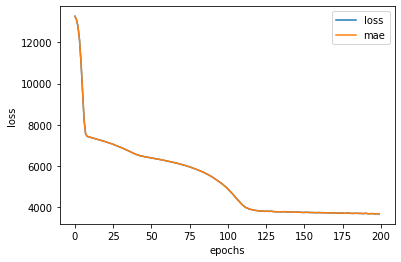

In [ ]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How long to train for?? It depends on the problem, keep experimenting...

"Early stopping" technique....

1/1 [==============================] - 0s 51ms/step - loss: 342.5332 - mae: 342.5332


[342.533203125, 342.533203125]

In [ ]:
insurance_model_3.predict(pooX)

1/1 [==============================] - 0s 73ms/step


array([[9437.602]], dtype=float32)

In [ ]:
X


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

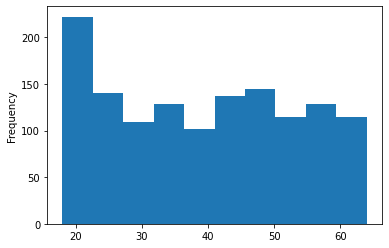

In [ ]:
X["age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

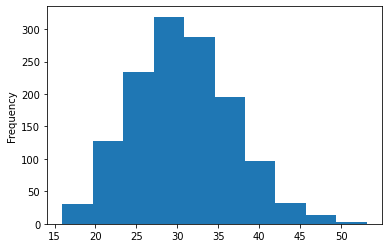

In [ ]:
X["bmi"].plot(kind = "hist")

### Preprocessing data (normalization and standardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


##Read in the insurance dataframe

insurancce = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
## Borrowing few classes from Scikit learn

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer
ct = make_column_transformer (
    (MinMaxScaler(), ["age", "bmi", "children"]),  ##turn all values in this column between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)


##Create X and y

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

#Build our train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Fit the column transformer to our training data

ct.fit(X_train)

##Transform training and test data with normazlization (MInMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
##WHat does our data look like

X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

*Building a NN model*

In [ ]:
tf.random.set_seed(42)

#1. Create a model

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model

insurance_model_4.fit(X_train_normal, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.3545 - mae: 13343.3545
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.7275 - mae: 13333.7275
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13310.3545 - mae: 13310.3545
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13262.3252 - mae: 13262.3252
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13178.6074 - mae: 13178.6074
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13048.2666 - mae: 13048.2666
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12861.1592 - mae: 12861.1592
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12607.2705 - mae: 12607.2705
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12276.4619 - mae: 12276.4619
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11865.85

In [ ]:
## Evaluate our insurance model trained on normalised data

insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3437.1489 - mae: 3437.1489


[3437.14892578125, 3437.14892578125]